## Web Scraping Practice - YOUTUBE

### Using selenium to open Chrome browser and scraping top 10 songs by Beautiful Soup

In [1]:
import csv
import time
import re

from selenium import webdriver
from bs4 import BeautifulSoup

In [ ]:
driver = webdriver.Chrome('chromedriver')
driver.get('https://www.youtube.com/')

search_input = driver.find_elements_by_css_selector('#search-input #search')[0]
search_btn = driver.find_elements_by_css_selector('#search-icon-legacy')[0]
search_input.send_keys('blackpink')
search_btn.click()

time.sleep(10)

# Scrape all content in the page.
page_content = driver.page_source
soup = BeautifulSoup(page_content, 'html.parser')

driver.quit()

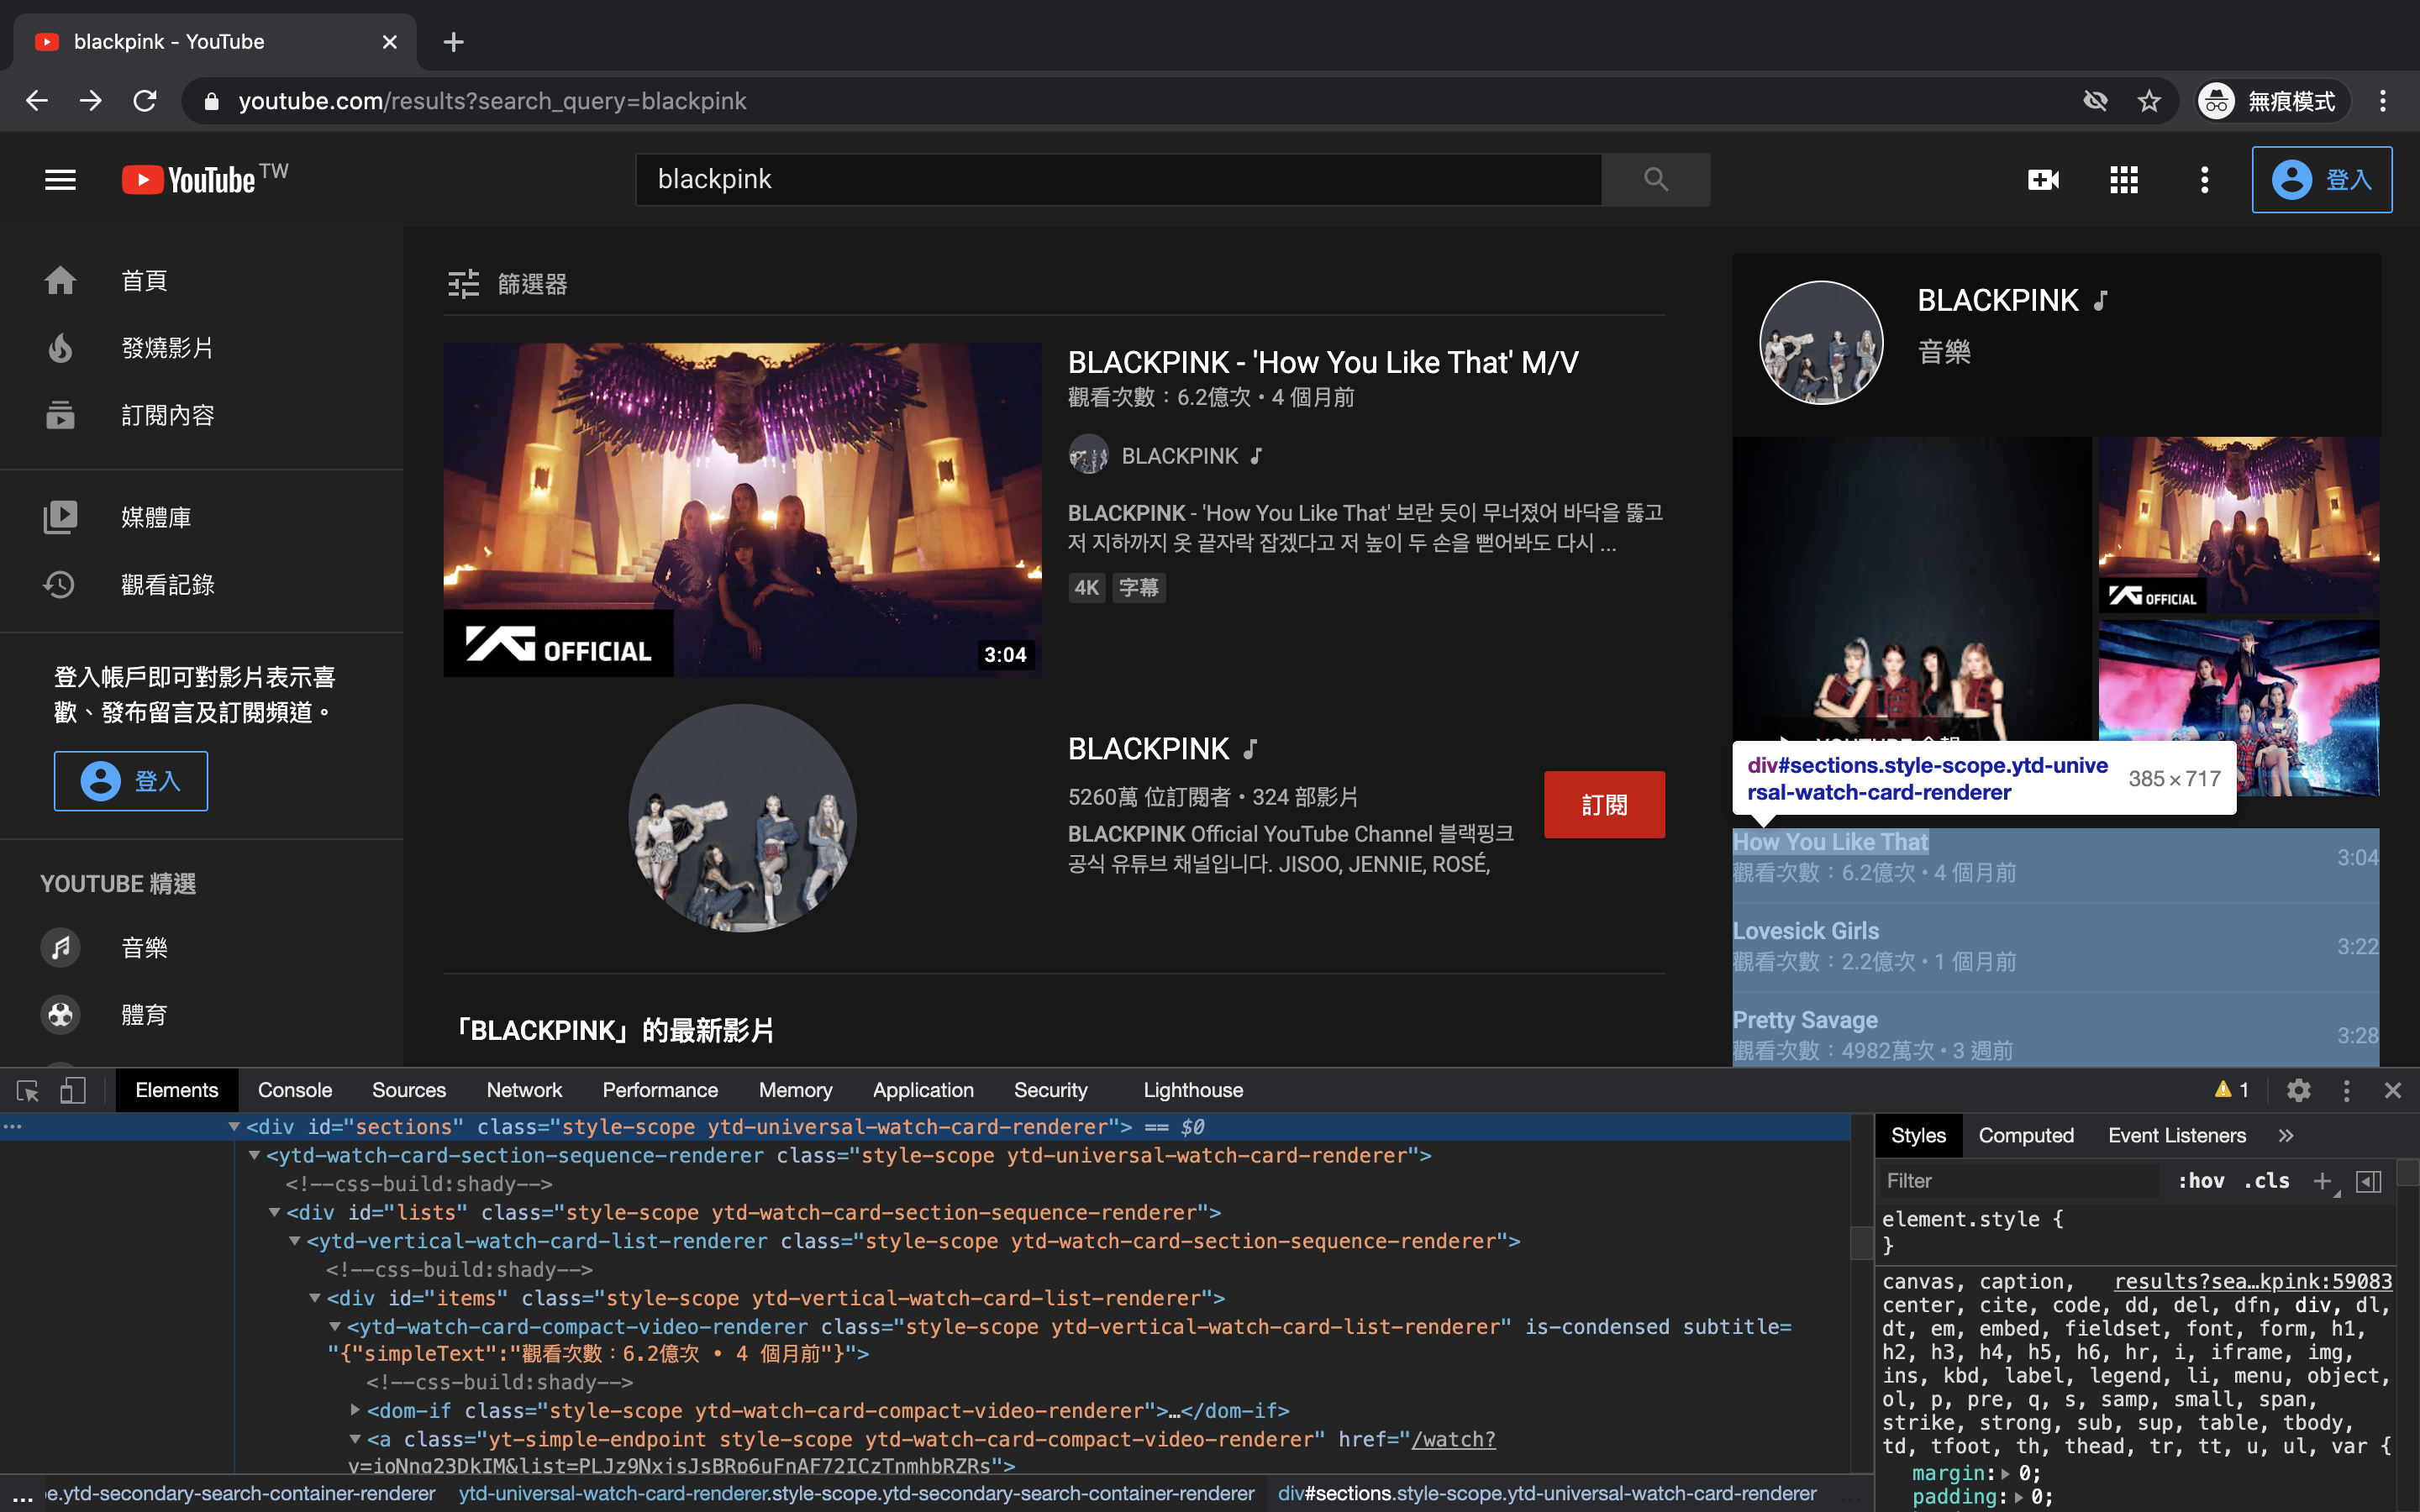

In [ ]:
# Use 'select' to pick up the contents which we need.
elements = soup.select('#sections #items ytd-watch-card-compact-video-renderer')

row_list = []
for element in elements:
    videoTitle = element.select('a yt-formatted-string')[0].text
    info = element.select('yt-formatted-string')[1].text
    info = info.split('•')
    count = re.findall(r'\d.*次', info[0])[0]
    releaseTime = info[1].strip()
    # 將資料整理成一個 dict
    data = {}
    data['影片標題'] = videoTitle
    data['觀看數'] = count
    data['釋出時間'] = releaseTime

    row_list.append(data)


headers = ['影片標題', '觀看數', '釋出時間']

with open('blackpink_video_top10.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, headers)
    dict_writer.writeheader()
    dict_writer.writerows(row_list)

with open('blackpink_video_top10.csv', 'r') as input_file:
    rows = csv.reader(input_file)
    for row in rows:
        print(row)

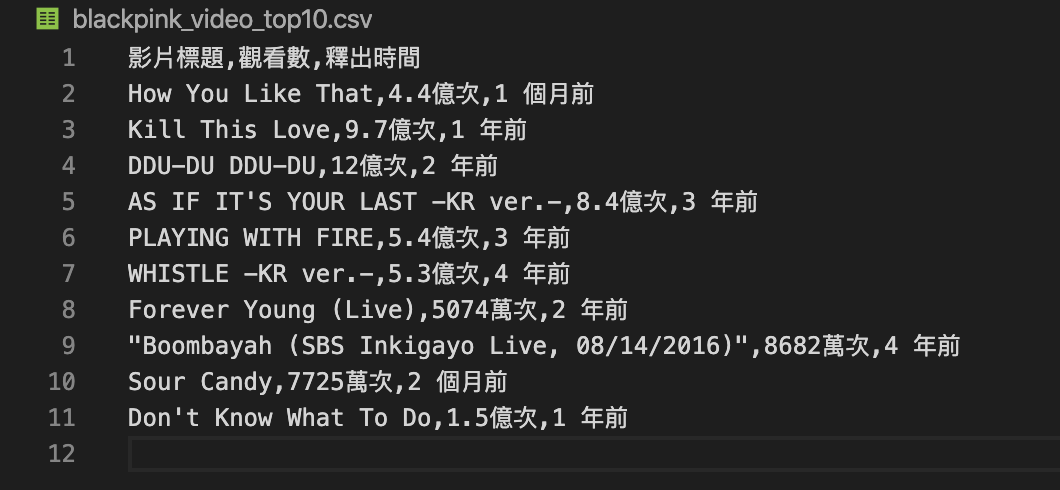